### 1.Import Libraries and Data

In [37]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import os

In [38]:
# Create directory path
path = r'C:\Users\luke_\Documents\FinalProject\02_data'

In [39]:
df = pd.read_csv(os.path.join(path, 'prepared_data', 'happiness_checked.csv'))

## 2.Exploring relationships

### a.Correlations

In [40]:
df.dtypes

year                      int64
rank                      int64
country_name             object
region                   object
happiness_score         float64
gdp/capita              float64
social_support          float64
life_expectancy         float64
freedom_of_choice       float64
generosity              float64
perceived_corruption    float64
dtype: object

In [41]:
df.isnull().sum()

year                    0
rank                    0
country_name            0
region                  0
happiness_score         0
gdp/capita              0
social_support          0
life_expectancy         0
freedom_of_choice       0
generosity              0
perceived_corruption    0
dtype: int64

In [42]:
#create a subset of the data excluding the 'country_name' column
sub = df[['year','rank','happiness_score','gdp/capita','social_support','life_expectancy','freedom_of_choice','generosity','perceived_corruption']]

In [43]:
sub.corr()

,year,rank,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
year,1.000000,-0.068150,0.063961,0.379993,0.055542,-0.165399,0.379892,-0.058892,-0.171003
rank,-0.068150,1.000000,-0.985312,-0.727862,-0.660043,-0.676426,-0.543904,-0.127507,-0.312948
happiness_score,0.063961,-0.985312,1.000000,0.713201,0.664928,0.676836,0.556815,0.146794,0.329309
gdp/capita,0.379993,-0.727862,0.713201,1.000000,0.545085,0.541771,0.471074,-0.050831,0.210234
social_support,0.055542,-0.660043,0.664928,0.545085,1.000000,0.561027,0.382751,0.107275,0.046457
life_expectancy,-0.165399,-0.676426,0.676836,0.541771,0.561027,1.000000,0.229778,0.058751,0.213609
freedom_of_choice,0.379892,-0.543904,0.556815,0.471074,0.382751,0.229778,1.000000,0.217900,0.297674
generosity,-0.058892,-0.127507,0.146794,-0.050831,0.107275,0.058751,0.217900,1.000000,0.143016
perceived_corruption,-0.171003,-0.312948,0.329309,0.210234,0.046457,0.213609,0.297674,0.143016,1.000000


### Create a correlation heatmap using matplotlib

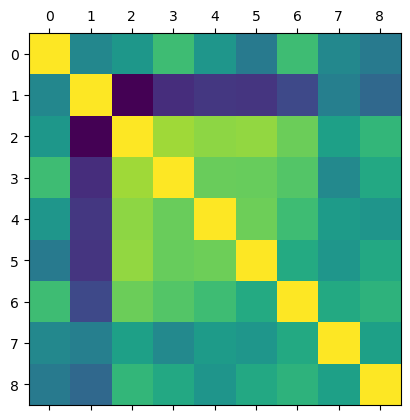

In [44]:
plt.matshow(sub.corr())
plt.show()

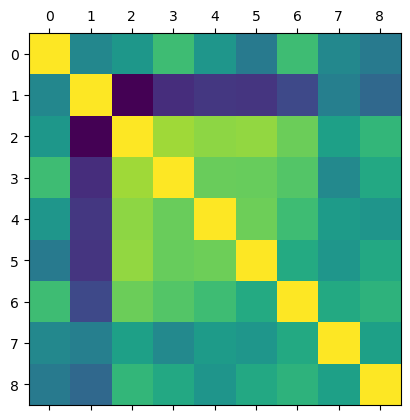

In [45]:
# Save figure in the working directory
plt.matshow(sub.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Correlation Matrix')

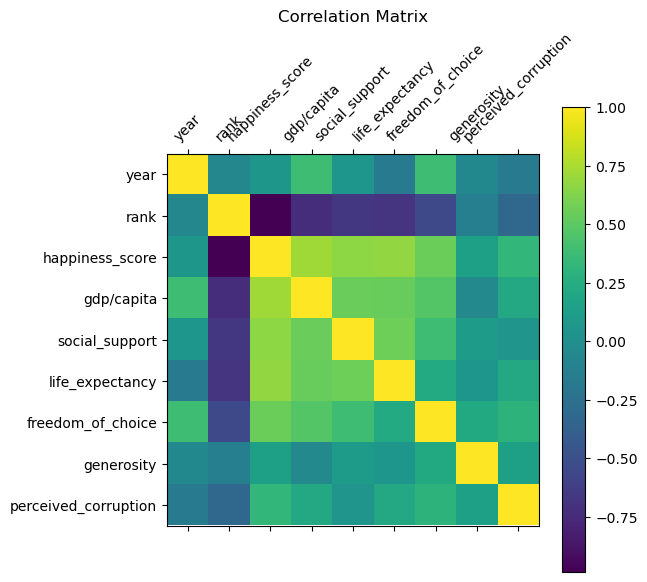

In [46]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

### Create the correlation heatmap in seaborn

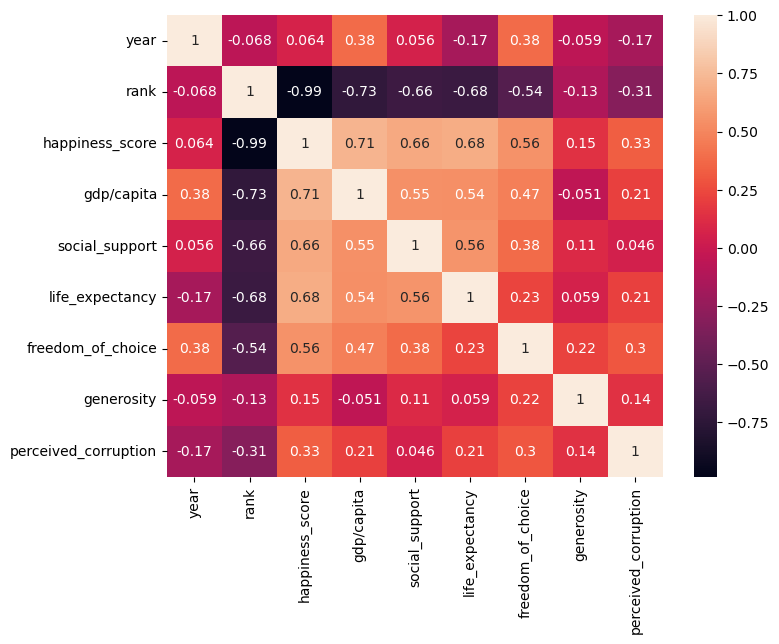

In [47]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### *Discuss what the coefficients in the plot mean in terms of the relationships between the variables.*

#### GDP per Capita:
#### GDP per capita shows a high positive correlation (0.71) with happiness_score, indicating that countries with higher GDP per capita generally have higher happiness scores. It also has moderate positive correlations with life_expectancy (0.55) and freedom_of_choice (0.47), suggesting that economic prosperity may also positively influence health and personal freedom.

#### Support:
#### Support has a strong positive correlation (0.66) with happiness_score, meaning social support is a key factor for happiness.It also correlates with life_expectancy (0.56) and freedom_of_choice (0.38), showing the potential interconnectedness between social support and other quality-of-life factors.

#### Life Expectancy:
#### Life_expectancy has a moderate to high correlation with happiness_score (0.68) and is also correlated with support (0.56) and GDP per capita (0.55), suggesting that a higher life expectancy is associated with greater happiness, likely due to the combined effects of better health and economic factors.

#### Freedom of Choice:
#### Freedom_of_choice shows a moderate positive correlation with happiness_score (0.56), indicating that perceived freedom contributes to higher happiness. It is also moderately correlated with GDP per capita (0.47) and support (0.38), which might indicate that economic and social factors can impact a person's perceived freedom.

#### Generosity:
#### Generosity has a low correlation with happiness_score (0.15), suggesting that it plays a less significant role in determining overall happiness in this dataset. It also has weak correlations with other factors, indicating it may be relatively independent of the other metrics.

#### Perceived Corruption:
#### Perceived corruption has a moderate positive correlation with happiness_score (0.33), suggesting that lower levels of corruption are associated with higher happiness. It shows some correlation with freedom_of_choice (0.3) and GDP per capita (0.21), indicating that perceptions of corruption may be influenced by economic conditions and personal freedoms.

#### Overall, happiness_score correlates most strongly with rank (inverse relationship), GDP per capita, support, and life_expectancy, indicating these are key contributors to happiness.
#### Variables like generosity and perceived corruption have lower correlations with happiness, suggesting that while they have some influence, they are not as significant as economic, social, and health factors.

#### I want to focus in on the four variables which seem to make the most impact on the Happiness Score. GDP per Capita, Freedom of Choice, Life Expectancy, and Social Support.

### b.Scatterplots

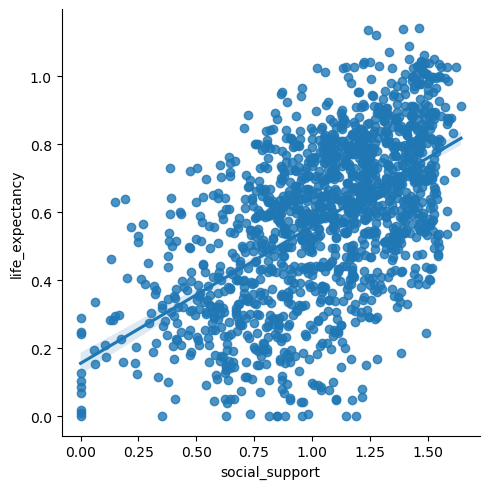

In [48]:
# Create a scatterplot for the social support and gdp_capita
sns.lmplot(x = 'social_support', y = 'life_expectancy', data = sub)

### *Discussion of the output of the scatterplot life_expectancy/social_support*

#### The scatterplot of the relatonship between life_expectancy/social_support show a strong positive correlation. As social support values increase, life expectancy values generally increase as well.
#### The spread of data points suggests variability, especially at higher levels of social support, indicating that life expectancy is not solely dependent on social support but may be influenced by other factors.
#### The trend line in the plot suggests a linear relationship, with a gradual slope indicating that higher social support might be associated with longer life expectancy, though other factors might moderate this relationship.

#### While there is a slight positive correlation between freedom of choice and perceived corruption, it is weak. This suggests that while regions with more perceived freedom of choice may also have higher perceived corruption, it is not a strong or consistent relationship. It could imply that freedom may lead to more open discussions and awareness about corruption rather than directly causing an increase in corruption.

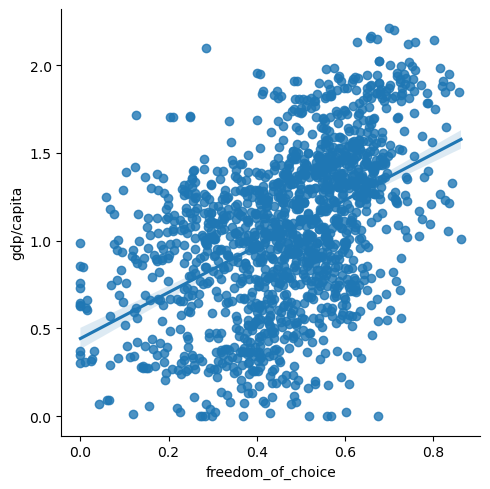

In [49]:
# Create a scatterplot for the Freedom of choice and gdp/capita columns in seaborn

sns.lmplot(x = 'freedom_of_choice', y = 'gdp/capita', data = sub)

### *Discussion of the output of the scatterplot gdp/capita and freedom of choice*
### In the scatterplot the relationship between gdp per capita and freedon of choise shows a strong correlation. As gdp per capita increases, so does the freedom of choice.
### However but the relationship is influenced by additional factors and varies widely, particularly at lower freedom levels. 
### This implies that only at a certain level of financial security are factors like freedom of choice more relevent.

### I would like to dig a little deeper into what variables actually come together to create the Happiness Score, and to hopefully uncover a better understanding behind how the variables interact with one another.

In [50]:
df_sub = df[['happiness_score', 'gdp/capita', 'social_support', 
   'life_expectancy', 'freedom_of_choice']]

In [51]:
df_sub.corr()

,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice
happiness_score,1.000000,0.713201,0.664928,0.676836,0.556815
gdp/capita,0.713201,1.000000,0.545085,0.541771,0.471074
social_support,0.664928,0.545085,1.000000,0.561027,0.382751
life_expectancy,0.676836,0.541771,0.561027,1.000000,0.229778
freedom_of_choice,0.556815,0.471074,0.382751,0.229778,1.000000


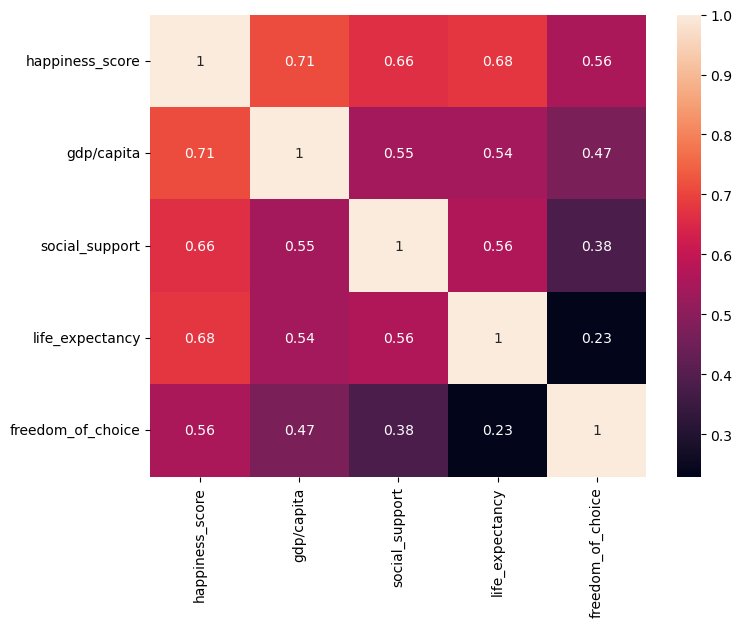

In [52]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### North America and Europe & Central Asia generally score high in most indicators, particularly happiness, GDP per capita, social support, and freedom of choice, reflecting high socio-economic development.
#### Sub-Saharan Africa and South Asia generally score lower on these variables, particularly in GDP per capita, life expectancy, and perceived freedom, indicating economic and social challenges.
#### Generosity is more evenly distributed among the regions, with Sub-Saharan Africa and East Asia & Pacific scoring slightly higher.

### c.Pair Plots

<Figure size 20x20 with 0 Axes>

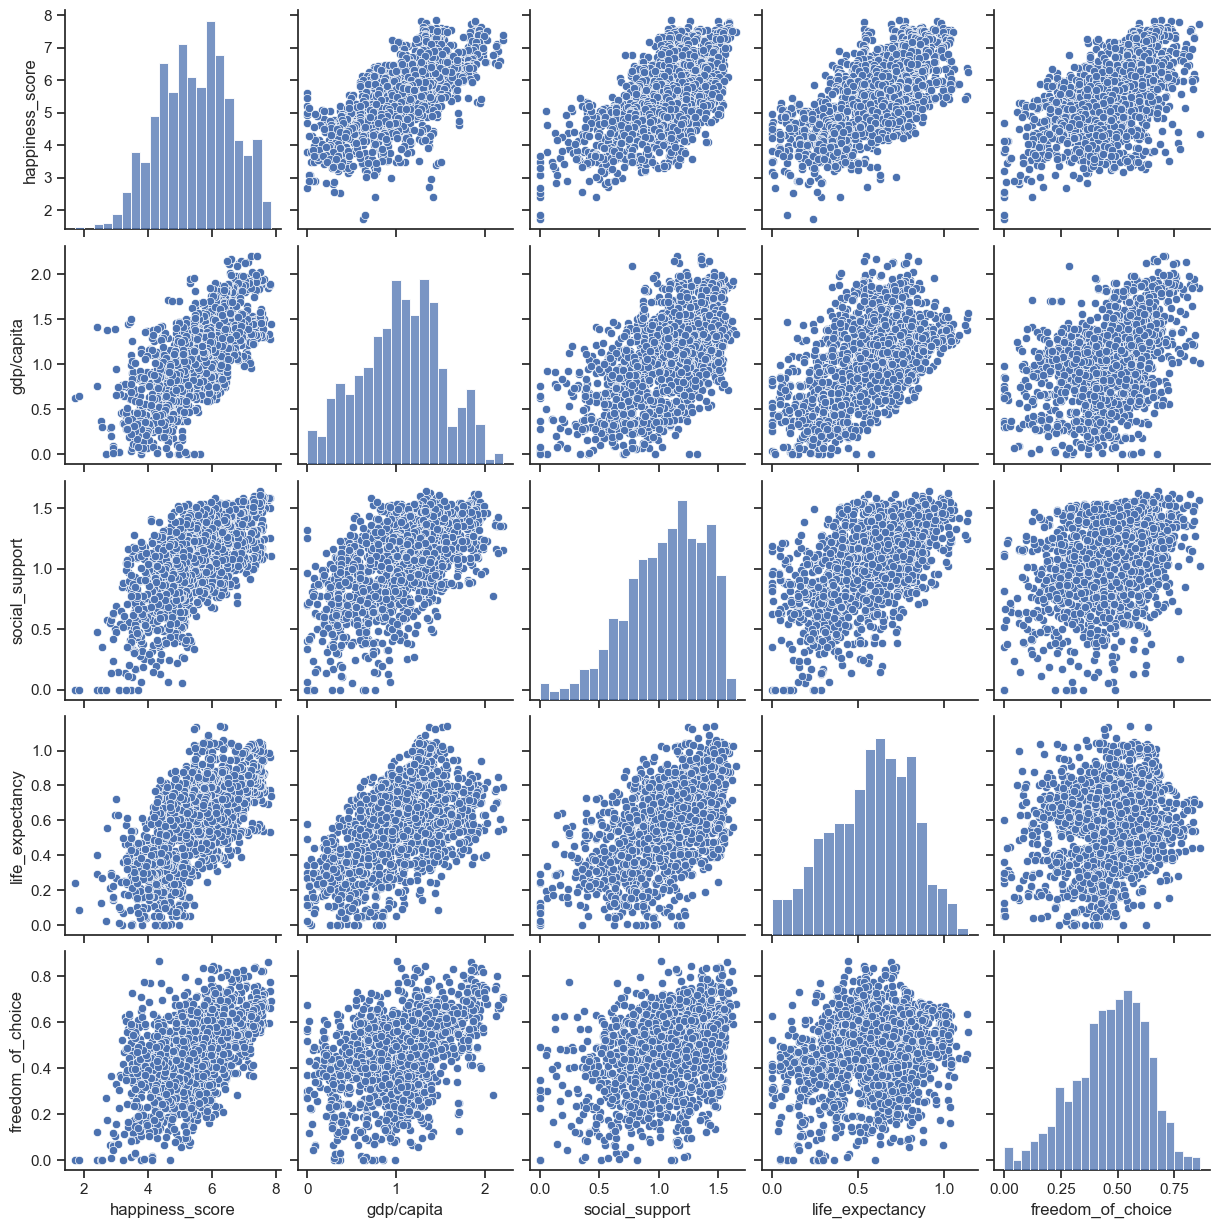

In [70]:
# Create a pair plot 
f = plt.figure(figsize=(0.2 , 0.2)) # figure size 
pairplot = g = sns.pairplot(df_sub)

In [72]:
g.savefig('pairplot.png')

### d.Categorical Plot

<Axes: xlabel='happiness_score', ylabel='Count'>

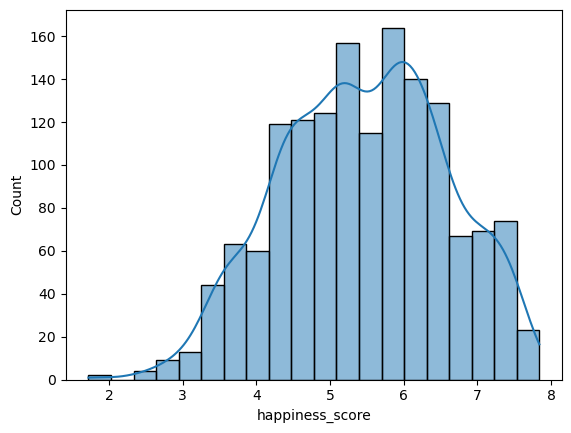

In [54]:
#create a Histogram to visualise the distribution of the variable
sns.histplot(df['happiness_score'], bins = 20, kde = True)

In [55]:
df.loc[df['happiness_score'] < 3.5, 'happiness_rated'] = 'Low Happiness'

In [56]:
df.loc[(df['happiness_score'] >= 3.5) & (df['happiness_score'] < 6.5), 'happiness_rated'] = 'Middle Happiness'

In [57]:
df.loc[df['happiness_score'] > 6.5, 'happiness_rated'] = 'High Happiness'

In [58]:
df['happiness_rated'].value_counts(dropna = False)

happiness_rated
Middle Happiness    1170
High Happiness       265
Low Happiness         62
Name: count, dtype: int64

### Create a categorical plot in seaborn 

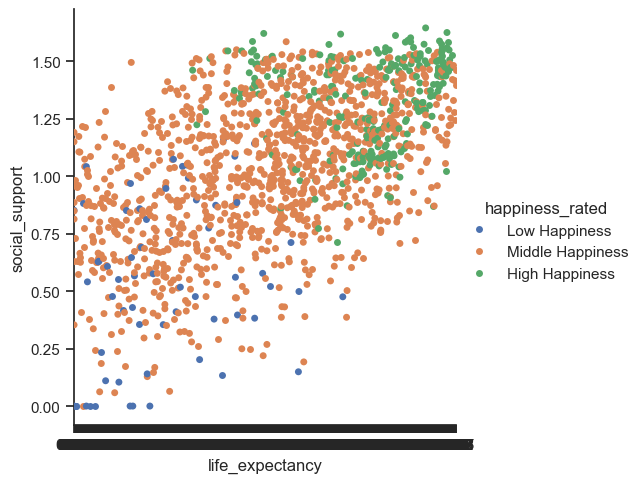

In [62]:
sns.set(style="ticks")
g = sns.catplot(x="life_expectancy", y="social_support", hue="happiness_rated", data=df)

### Interpretation of the Categorical Plot
#### Low Happiness (blue): These points tend to cluster in the lower regions of both life expectancy and social support. This implies that countries with low life expectancy and limited social support are more likely to experience lower happiness levels.
#### Middle Happiness (orange): These points are distributed across the middle to high ranges for both variables. This indicates that moderate levels of life expectancy and social support correspond with middle levels of happiness.
#### High Happiness (green): The green points are predominantly located in the higher range of both life expectancy and social support, suggesting that countries with higher social support and life expectancy also report higher happiness levels.

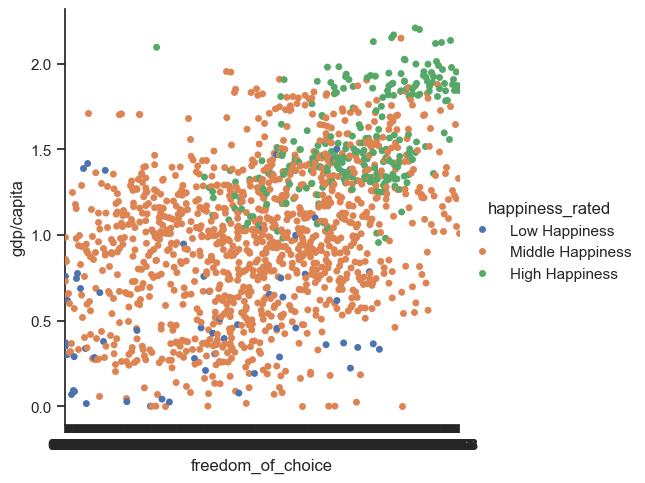

In [63]:
sns.set(style="ticks")
g = sns.catplot(x="freedom_of_choice", y="gdp/capita", hue="happiness_rated", data=df)

### Interpretation of the Categorical Plot
#### Low Happiness (blue): These points tend to cluster towards the lower end of both freedom of choice and GDP per capita. This indicates that countries with limited freedom of choice and lower GDP per capita are generally associated with lower happiness levels.
#### Middle Happiness (orange): These points are more widely spread across the middle to high ranges of both freedom of choice and GDP per capita. This suggests that countries with moderate levels of freedom and GDP per capita experience middle levels of happiness.
#### High Happiness (green): The green points generally cluster in the higher range of both variables. This indicates that high happiness ratings are most common in countries with both high freedom of choice and high GDP per capita.

### - e.More Questions and Hypothesis

### *Add any new questions that may have arisen based on the early findings in your visual exploration.*
#### How do the variables change in the region


### *Define any hypotheses that you can at this point.*
### Although GDP plays an important role in happiness, there are other factors involved which are critical for the overall Happiness Score.

In [76]:
df.to_csv('C:\\Users\\luke_\\Desktop\\happiness_rated.csv', index=False)